<a href="https://colab.research.google.com/github/Ashishxyz/HealthVision/blob/main/BestModelTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Description**

Imagine the ability to identify the risk of blindness before it occurs.

Diabetic retinopathy, a major cause of vision loss among working-age adults, affects millions worldwide. Aravind Eye Hospital in India aims to tackle this issue by improving detection and prevention efforts, particularly in rural areas where access to medical screenings is limited. Successful solutions developed in this competition will enhance the hospital's capacity to identify individuals at risk and will be shared with other ophthalmologists through the 4th Asia Pacific Tele-Ophthalmology Society (APTOS) Symposium.

Currently, technicians from Aravind travel to remote regions to capture retinal images, which are then analyzed by specialized doctors for diagnosis. Their objective is to leverage technology to automate the screening process, enabling faster and more efficient assessments of eye health and providing insights into the severity of any conditions detected.

**About the Dataset**

[APTOS 2019 Blindness Detection - Kaggle](https://www.kaggle.com/c/aptos2019-blindness-detection/data)

Diabetic retinopathy (DR) progresses through several stages, each marked by distinct characteristics:

- **Stage 0: No Diabetic Retinopathy** – At this stage, there are no observable signs of the disease.
- **Stage 1: Mild Nonproliferative Retinopathy** – Small balloon-like bulges, known as microaneurysms, appear in the tiny retinal blood vessels. These bulges can release fluid and minimal amounts of blood into the retina.
- **Stage 2: Moderate Nonproliferative Retinopathy** – As the disease progresses, more blood vessels become damaged and may begin to block, restricting blood flow to the retina and causing ischemia (reduced oxygen supply).
- **Stage 3: Severe Nonproliferative Retinopathy** – A larger number of blood vessels are blocked, resulting in significant reduction of blood supply to the retina.
- **Stage 4: Proliferative Retinopathy** – Abnormal new blood vessels form on the surface of the retina and optic nerve. These vessels are fragile and prone to bleeding, potentially leading to severe vision impairment or blindness if untreated.

For the competition, participants were provided with a dataset containing over 5,000 retinal images, each labeled by medical professionals according to one of the five DR stages. The task was to develop machine learning or deep learning models capable of classifying these images into the respective categories.

**Business Constraints**  
The solution does not require extremely low latency, as the results can take a few seconds without impacting doctors or patients. However, achieving a high recall score is critical to minimize the risk of false negatives, as undiagnosed cases of DR could be harmful. Additionally, interpretability is crucial; it is important for the model to provide reasoning behind its classification of the retina's DR stage.

**Performance Metrics**  
The competition's evaluation metric is the quadratic weighted kappa, which assesses the level of agreement between two sets of ratings, with values ranging from 0 to 1. A score of 0 indicates no better than random agreement, while 1 represents perfect agreement. The kappa score is computed through the following steps:

1. A confusion matrix is constructed for the five classes based on the actual versus predicted ratings.
2. Weights for each class pair are determined using the formula:  
   $$
\text{Weight} = 1 - \left(\frac{\text{distance}}{\text{maximum possible distance}}\right)^2
$$

   where the 'distance' is the absolute difference between the class numbers. In this case, the maximum possible distance is \( |0 - 4| = 4 \).
3. Each weight is multiplied by the corresponding value in the confusion matrix.

To calculate the kappa value, the formula used is:  
$$
\kappa = \frac{\text{Probability of agreement} - \text{Probability of random agreement}}{1 - \text{Probability of random agreement}}
$$

- The probability of agreement is the sum of the values along the main diagonal of the confusion matrix.
- To compute the probability of random agreement, the likelihood of each class is determined by dividing the frequency of each class in both the actual and predicted data by the total number of data points.  
- For each pair of actual and predicted classes, the probabilities of both classes are multiplied by their corresponding weight.  
- These products are summed to calculate the probability of random agreement.

**Necessary Installations**

In [ ]:
!pip uninstall typeguard inflect tensorflow-addons -y
!pip install tensorflow-addons==0.23.0 typeguard==2.13.3 inflect==5.3.0

!pip install tensorflow==2.15.0

import tensorflow as tf
import tensorflow_addons as tfa

print("TensorFlow version:", tf.__version__)
print("TensorFlow Addons version:", tfa.__version__)

!pip install lime

Found existing installation: typeguard 4.3.0
Uninstalling typeguard-4.3.0:
  Successfully uninstalled typeguard-4.3.0
Found existing installation: inflect 7.4.0
Uninstalling inflect-7.4.0:
  Successfully uninstalled inflect-7.4.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: m

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


TensorFlow version: 2.15.0
TensorFlow Addons version: 0.23.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=668e92bc2f70609866bd978c4d97e58d060f6ee702907bcff078e65931b7231c
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


**Importing, Reading, and Splitting the Data**  
We will be utilizing a variety of libraries in this project. Below is the list of necessary imports:

In [ ]:
import numpy as np
import pandas as pd
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import DenseNet121
import tensorflow_addons as tfa
import tensorflow as tf
from tqdm import notebook
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
import seaborn as sns
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries

We will define a couple of variables:

In [ ]:
IMG_SIZE = 256
BATCH_SIZE = 32

**Reading and Viewing the Data**  

To load the dataset, we will read the CSV file containing the training data:

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!kaggle competitions download -c aptos2019-blindness-detection

100% 9.51G/9.51G [01:39<00:00, 203MB/s]
100% 9.51G/9.51G [01:39<00:00, 103MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/aptos2019-blindness-detection.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
df = pd.read_csv('/content/train.csv')
df.head()

id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0

**Splitting and Reindexing the Data into Training and Validation Sets**  

We will divide the data into training and validation sets using the following code:

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(df['id_code'], df['diagnosis'], test_size=0.15, stratify=df['diagnosis'], random_state=100)  # Splitting the dataset
x_train = x_train.reset_index(drop=True)  # Reindexing the training set
x_val = x_val.reset_index(drop=True)      # Reindexing the validation set
y_train = y_train.reset_index(drop=True)  # Reindexing the training labels
y_val = y_val.reset_index(drop=True)      # Reindexing the validation labels

This code separates the features and labels into training and validation datasets, ensuring that the distribution of diagnoses is maintained in both sets.

**Exploratory Data Analysis**  
**Sample Images from Each Class**  

To gain insights into the dataset, we will examine sample images representative of each class:

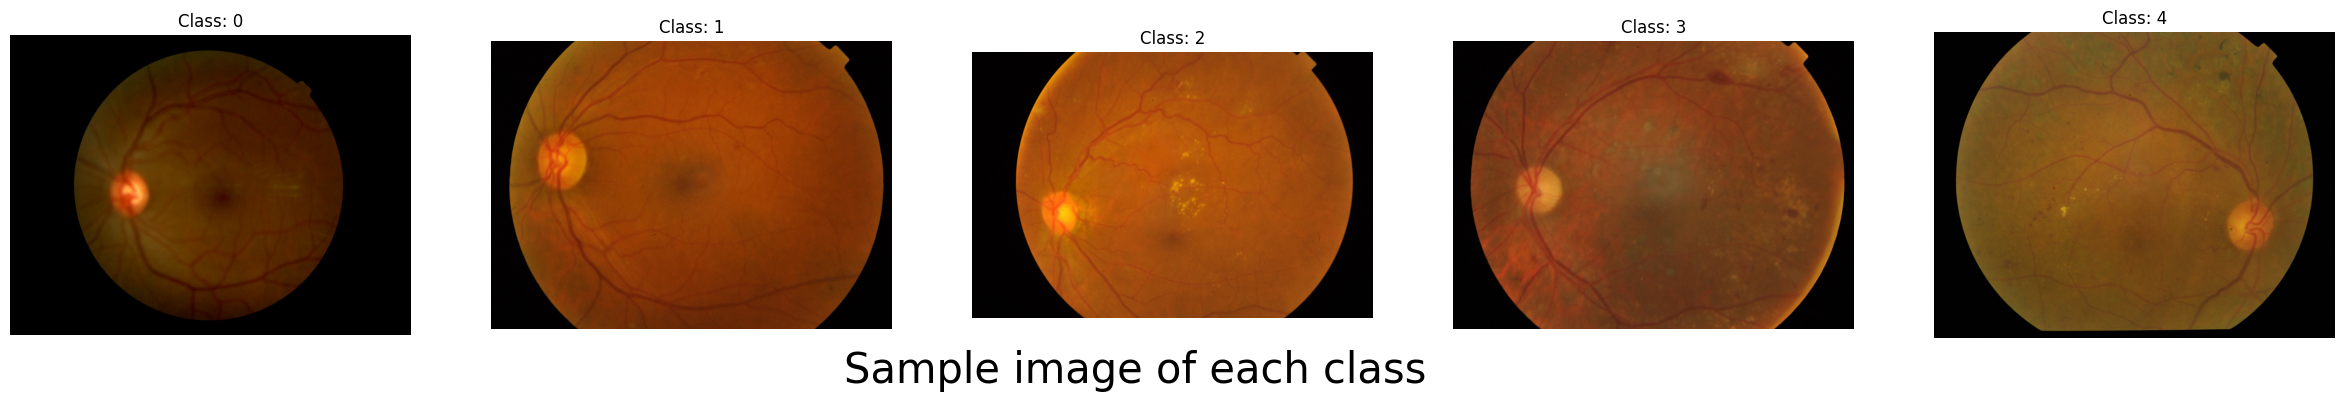

In [ ]:
import cv2
import matplotlib.pyplot as plt

plt.figure(figsize=[30, 30])  # Setting the figure size
for x in range(5):  # Looping through all classes
    img = df[df['diagnosis'] == x].iloc[1]['id_code'] + '.png'  # Retrieving an image for class x
    path = "/content/train_images/"
    img = cv2.imread(path + img)  # Reading the image file
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converting the image from BGR to RGB
    plt.subplot(1, 5, x + 1)  # Plotting the image in a subplot
    plt.grid(None)
    plt.axis('off')
    plt.title("Class: " + str(x))  # Adding the title for each subplot
    plt.imshow(img)

# Adding the text below the images
plt.suptitle("Sample image of each class", fontsize=30, y=0.44)  # Adjust y to position the title

plt.show()  # Show the plot after the loop

This code sets up a visual representation of sample images from each class in the dataset, allowing us to better understand the variations among different stages of diabetic retinopathy.

**Count of Images in Each Class**  

To determine the distribution of images across the different classes, we will create a histogram:

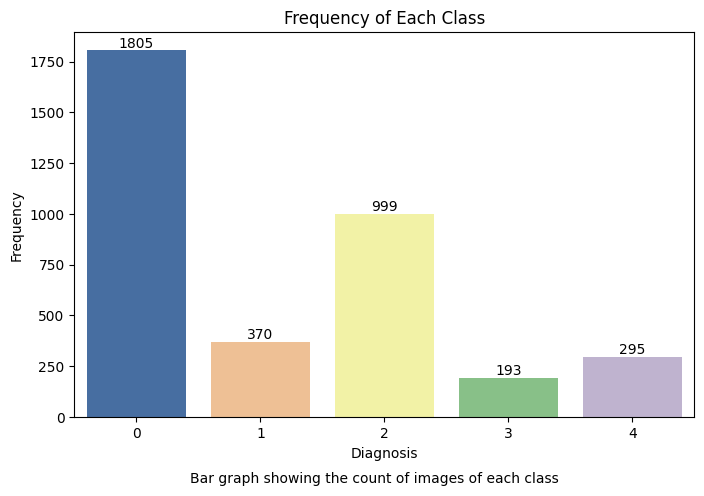

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 5))
# Creating a bar plot with 'hue' set to a placeholder (e.g., the diagnosis itself)
sns.barplot(x=[x for x in range(5)],
            y=[df['diagnosis'].value_counts()[x] for x in range(5)],
            palette='Accent',
            ax=ax,
            hue=[df['diagnosis'].value_counts()[x] for x in range(5)],  # Use a placeholder hue
            legend=False)  # Disable the legend

for p in ax.patches:  # Annotating the bars with counts
    ax.annotate('{}'.format(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')  # Center the annotation above the bar

plt.ylabel('Frequency')  # Adding the y-axis label
plt.xlabel('Diagnosis')  # Adding the x-axis label
plt.title('Frequency of Each Class')  # Adding the plot title

plt.suptitle("Bar graph showing the count of images of each class", fontsize=10, y=0)

plt.show()

The most frequent class in the dataset is class 0

**Helper Code**  

The following helper code is designed to collect data for plotting eight different visualizations:

In [ ]:
heights = []  # List to store image heights
widths = []   # List to store image widths
per_class = {0: ([], []), 1: ([], []), 2: ([], []), 3: ([], []), 4: ([], [])}  # Dictionary to store heights and widths for each class

for row in df.iterrows():
    path = '/content/train_images/' + row[1]['id_code'] + '.png'
    img = cv2.imread(path)
    heights.append(img.shape[0])  # Storing the height of the image
    widths.append(img.shape[1])    # Storing the width of the image
    per_class[row[1]['diagnosis']][0].append(img.shape[0])  # Storing heights per class
    per_class[row[1]['diagnosis']][1].append(img.shape[1])  # Storing widths per class

**Distribution of Image Heights and Widths**  

Since the images in the dataset originate from various sources, their heights and widths can differ significantly. We can visualize the distribution of image heights using a histogram:

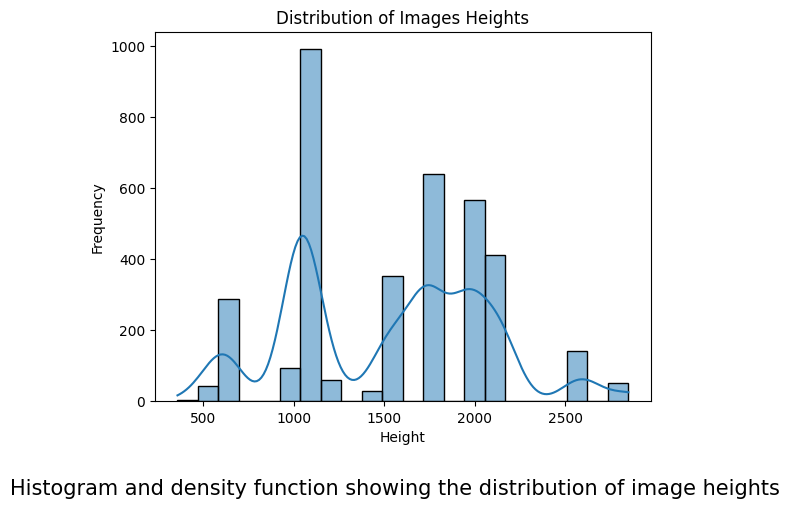

In [ ]:
sns.histplot(x=heights, kde=True)  # Histogram for visualizing image heights
plt.ylabel('Frequency')              # Adding the y-axis label
plt.xlabel('Height')                 # Adding the x-axis label
plt.title('Distribution of Images Heights')  # Adding the plot title

plt.suptitle("Histogram and density function showing the distribution of image heights", fontsize=15, y=-0.05)

plt.show()

The image heights in the dataset range from 250 to 2750 pixels, with approximately 1000 pixels being the most common height.

To visualize the distribution of image widths, we can use the following histogram:

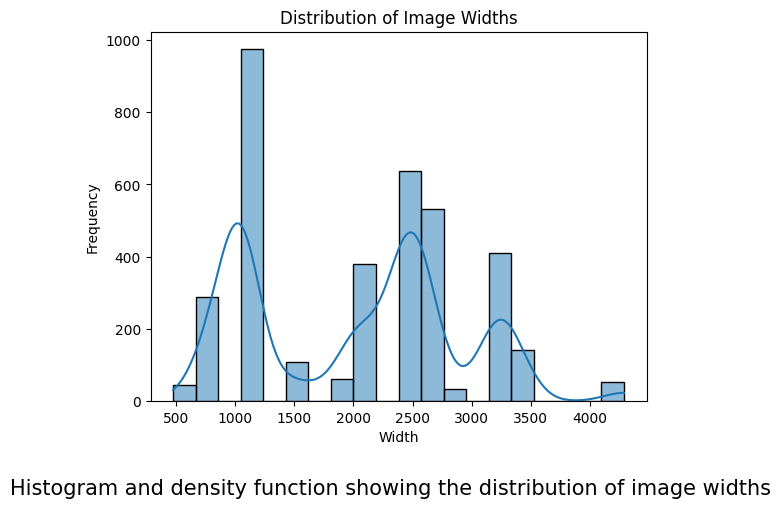

In [ ]:
sns.histplot(x=widths, kde=True)  # Histogram for visualizing image widths
plt.ylabel('Frequency')             # Adding the y-axis label
plt.xlabel('Width')                 # Adding the x-axis label
plt.title('Distribution of Image Widths')  # Adding the plot title

plt.suptitle("Histogram and density function showing the distribution of image widths", fontsize=15, y=-0.05)

plt.show()

The image widths in the dataset range from 500 to 4250 pixels, with approximately 1000 pixels being the most frequently occurring width.

**Distribution of Inverse Aspect Ratios of Images**  

The aspect ratio of an image indicates the relationship between its width and height, typically expressed as width:height. In this case, we are calculating the height-to-width ratio (the inverse of the aspect ratio) because all images are oriented in landscape format, which limits the distribution of height-to-width ratios between 0 and 1.

To visualize this distribution, we can use the following code:

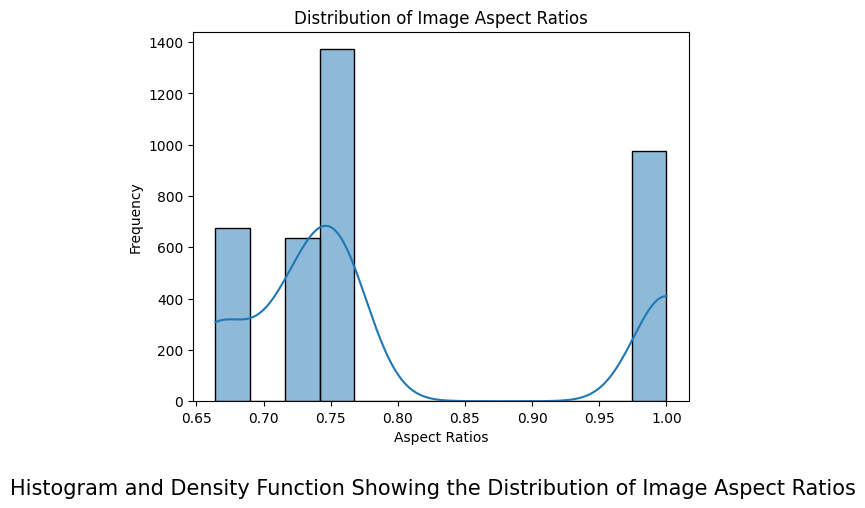

In [ ]:
aspect_ratios = [heights[x] / widths[x] for x in range(len(heights))]
sns.histplot(x=aspect_ratios, kde=True)  # Histogram for visualizing aspect ratios
plt.ylabel('Frequency')                    # Adding the y-axis label
plt.xlabel('Aspect Ratios')                # Adding the x-axis label
plt.title('Distribution of Image Aspect Ratios')  # Adding the plot title

plt.suptitle("Histogram and Density Function Showing the Distribution of Image Aspect Ratios", fontsize=15, y=-0.05)

plt.show()

The majority of images exhibit an aspect ratio of approximately 0.75, which corresponds to a ratio of 3:4.

**Number of Images of Each Size for a Given Class**  

To visualize the sizes of images within each class, we will use bubble plots. A bubble plot is a variation of a scatter plot where varying bubble sizes represent an additional variable. In this case, the plot will illustrate different image sizes, with the bubble size indicating the number of images corresponding to each size.

We can create the plot with the following code:

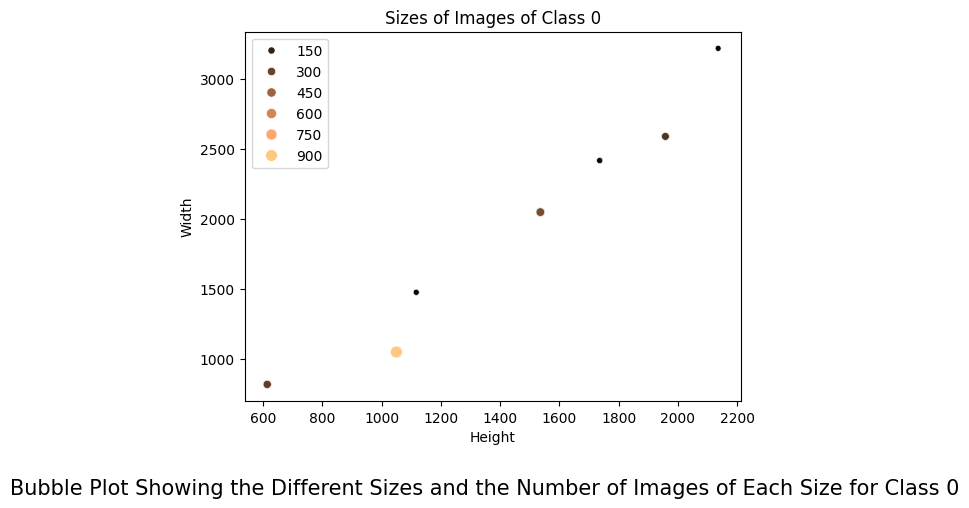

In [ ]:
import collections

merged = [(per_class[0][0][x], per_class[0][1][x]) for x in range(len(per_class[0][0]))]  # List of tuples containing image dimensions
freq = collections.Counter(merged)  # Counting occurrences of each size
sizes = [freq[x] for x in merged]    # Extracting the count of each size
sns.scatterplot(x=per_class[0][0], y=per_class[0][1], size=sizes, hue=sizes, palette='copper')  # Creating the bubble plot
plt.title('Sizes of Images of Class 0')  # Adding the plot title
plt.xlabel('Height')                       # Adding the x-axis label
plt.ylabel('Width')                        # Adding the y-axis label

plt.suptitle("Bubble Plot Showing the Different Sizes and the Number of Images of Each Size for Class 0", fontsize=15, y=-0.05)

plt.show()

A significant number of images in class 0 have an approximate size of 1000x1000 pixels.

Likewise, the bubble plots for the other classes can be generated using the same code provided above.

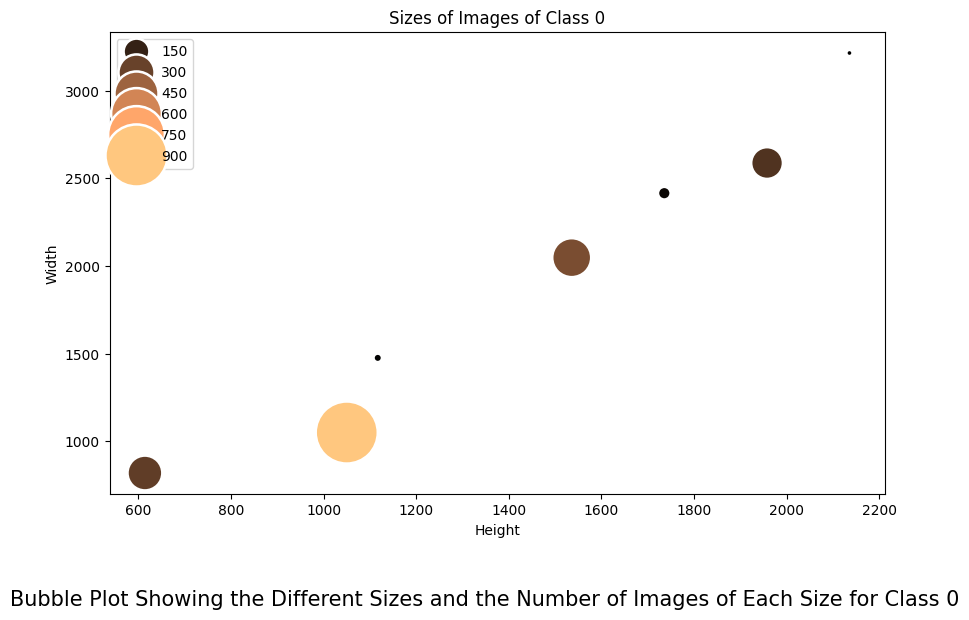

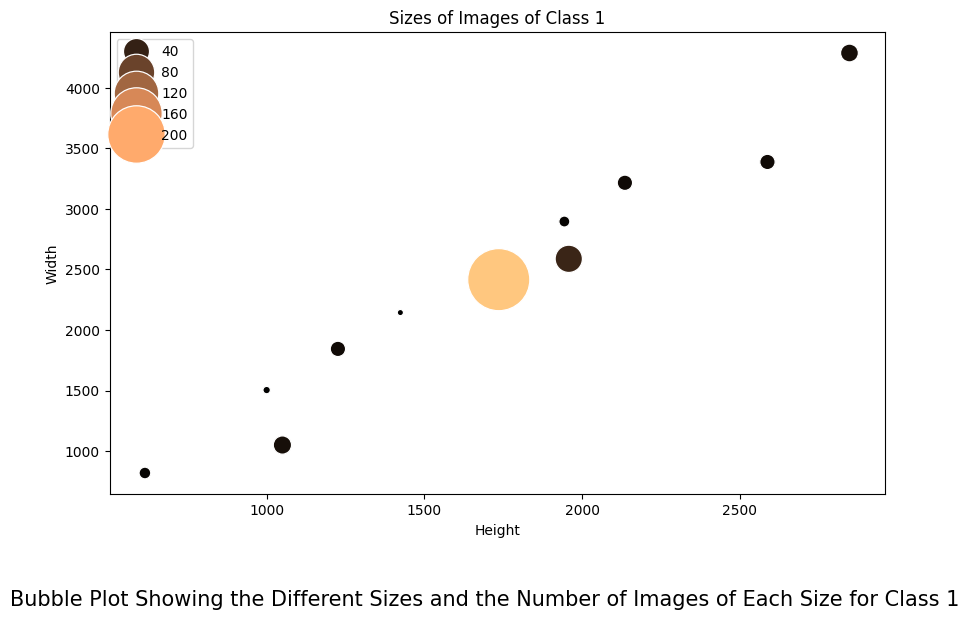

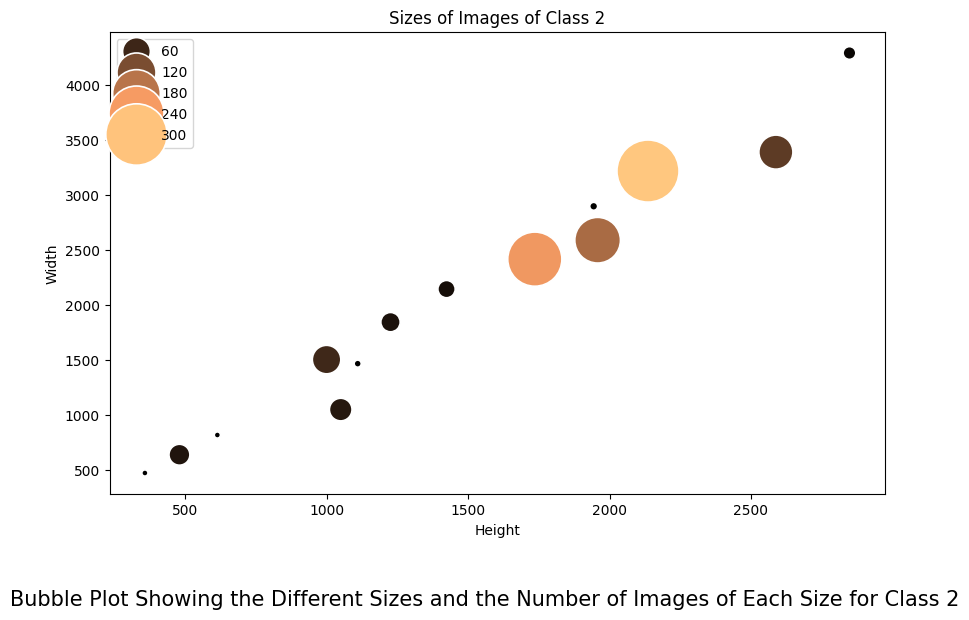

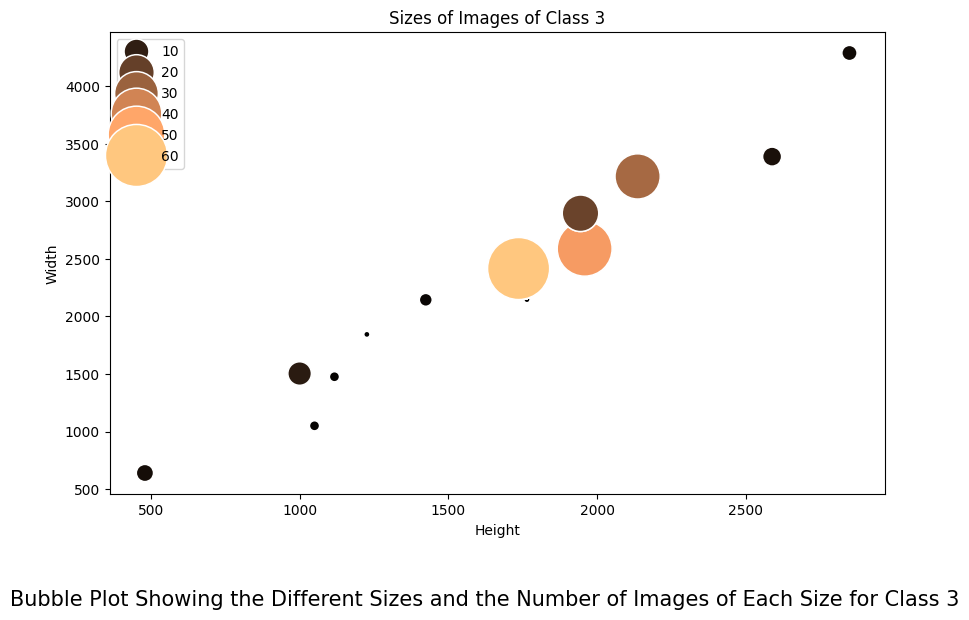

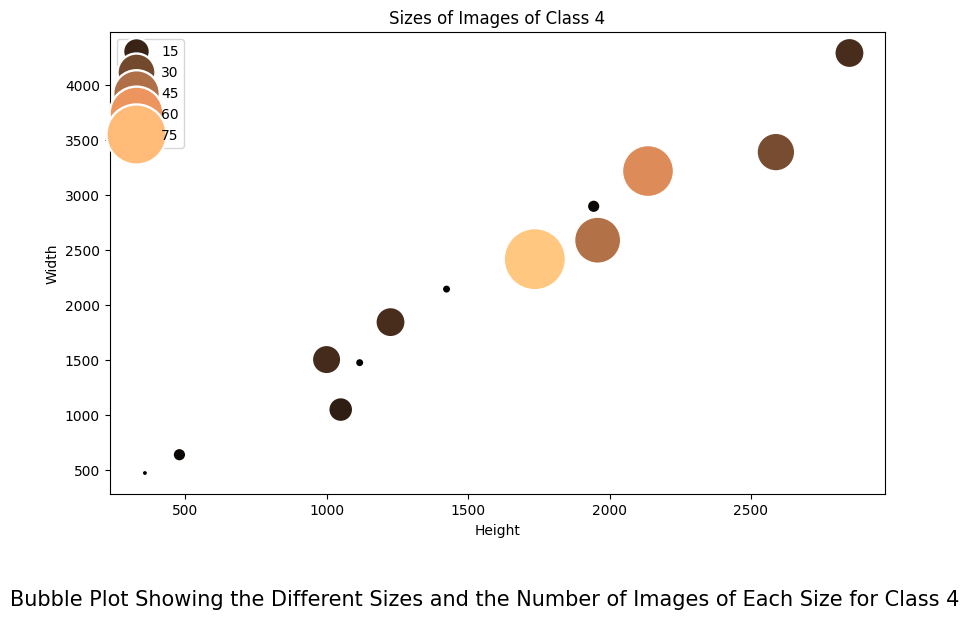

In [ ]:
import collections
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create bubble plot for a specific class
def create_bubble_plot(class_index):
    merged = [(per_class[class_index][0][x], per_class[class_index][1][x]) for x in range(len(per_class[class_index][0]))]  # List of tuples containing image dimensions
    freq = collections.Counter(merged)  # Counting occurrences of each size
    sizes = [freq[x] for x in merged]    # Extracting the count of each size

    plt.figure(figsize=(10, 6))  # Set figure size
    sns.scatterplot(x=per_class[class_index][0], y=per_class[class_index][1], size=sizes, hue=sizes, palette='copper', sizes=(20, 2000))  # Creating the bubble plot
    plt.title(f'Sizes of Images of Class {class_index}')  # Adding the plot title
    plt.xlabel('Height')                       # Adding the x-axis label
    plt.ylabel('Width')                        # Adding the y-axis label
    plt.suptitle(f"Bubble Plot Showing the Different Sizes and the Number of Images of Each Size for Class {class_index}", fontsize=15, y=-0.05)
    plt.show()

# Create bubble plots for all classes
for i in range(5):
    create_bubble_plot(i)

**Average Image of Each Class**  

To create an average image for each class, we resize all the images of varying dimensions to a standard size and then compute the average pixel value for each pixel across all images in that particular class.

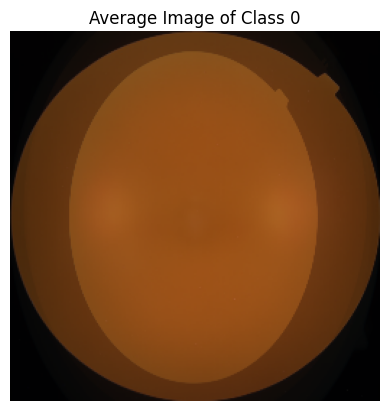

In [ ]:
count = 0
avg = np.zeros(shape=(256, 256, 3))  # Initialize an array to hold the cumulative sum of pixel values
for row in df[df['diagnosis'] == 0].iterrows():
    path = '/content/train_images/' + row[1]['id_code'] + '.png'
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (256, 256))  # Resize the image to 256x256 pixels
    avg += img  # Add the resized image to the average
    count += 1  # Increment the count of images
plt.grid(None)
plt.axis('off')
plt.title('Average Image of Class 0')  # Set the title for the plot
plt.imshow(np.round(avg/count).astype(int));  # Display the average image

The average images for the other classes can be generated using the same approach as demonstrated above.

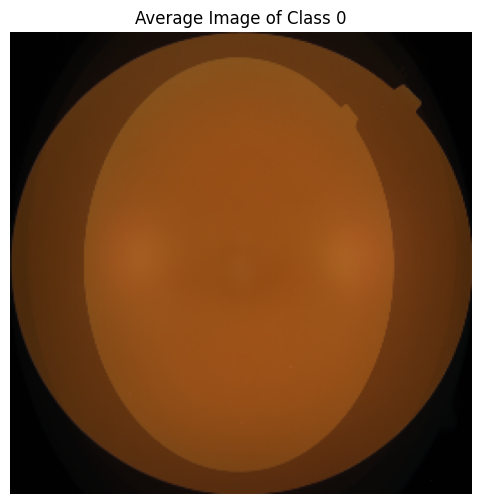

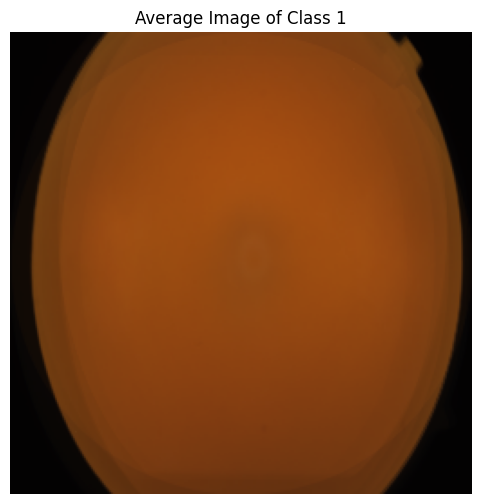

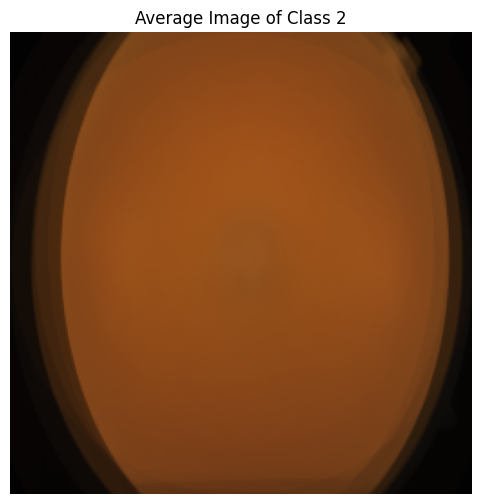

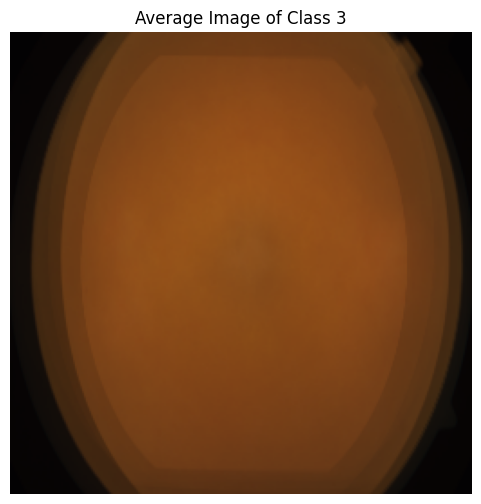

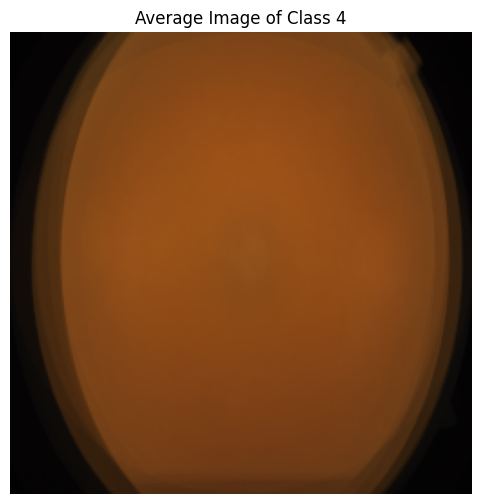

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to calculate and display the average image for a specific class
def display_average_image(class_index):
    count = 0
    avg = np.zeros(shape=(256, 256, 3))  # Initialize an array to hold the cumulative sum of pixel values
    for row in df[df['diagnosis'] == class_index].iterrows():
        path = '/content/train_images/' + row[1]['id_code'] + '.png'
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        img = cv2.resize(img, (256, 256))  # Resize the image to 256x256 pixels
        avg += img  # Add the resized image to the average
        count += 1  # Increment the count of images

    plt.figure(figsize=(6, 6))  # Set figure size
    plt.grid(None)
    plt.axis('off')
    plt.title(f'Average Image of Class {class_index}')  # Set the title for the plot
    plt.imshow(np.round(avg/count).astype(int))  # Display the average image
    plt.show()

# Display average images for all classes
for i in range(5):
    display_average_image(i)

The average image of class 0, representing a healthy eye, appears significantly smoother compared to the images of the other classes.

### **Preprocessing**

#### Cropping

The eyeball images contain a significant amount of surrounding black pixels that do not provide any useful information. Therefore, it is essential to crop out as much of the black area as possible before training the model. We will explore two distinct methods for cropping the images.

**Method 1**

This cropping technique is adapted from a [research paper](https://arxiv.org/pdf/2006.07475). While it effectively eliminates most of the uninformative black regions, it may also remove some valuable information.

In [ ]:
def crop_image(img):

    # Determine the height and width of the image
    h = img.shape[0]
    w = img.shape[1]

    # Calculate the center pixel
    Ch = h // 2
    Cw = w // 2

    # Find the first non-black pixel directly above the center pixel
    P = 0
    for i in range(Ch):
        if not(all(img[i][Cw] == 0)):
            P = i
            break

    # Calculate the radius of the retina
    R = Ch - P

    # Define the cropping boundaries
    X1 = Ch - R
    X2 = Ch + R
    Y1 = Cw - R
    Y2 = Cw + R

    img_cropped = []
    # Crop the image
    for i in range(3):
        img_cropped.append(img[X1:X2, Y1:Y2, i])

    img_cropped = np.dstack(img_cropped)

    return img_cropped

This cropping approach is inspired by [Kaggle kernel](https://www.kaggle.com/code/ratthachat/aptos-eye-preprocessing-in-diabetic-retinopathy#3.A-Important-Update-on-Color-Version-of-Cropping-&-Ben's-Preprocessing) and utilizes a boolean array to distinguish between dark and light pixels in the images. This method effectively removes the majority of the black areas while retaining all essential information. We will implement this method in our preprocessing pipeline.


In [ ]:
def crop_image_from_gray(img, tol=7):
    # For grayscale images
    if img.ndim == 2:
        mask = img > tol
        return img[np.ix_(mask.any(axis=1), mask.any(axis=0))]  # Create a boolean array for rows and columns

    # For RGB images
    elif img.ndim == 3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # Convert RGB image to grayscale
        mask = gray_img > tol  # Create a boolean mask

        check_shape = img[:, :, 0][np.ix_(mask.any(axis=1), mask.any(axis=0))].shape[0]
        if check_shape == 0:  # If the whole image is too dark and cropped
            return img  # Return the original image
        else:
            img1 = img[:, :, 0][np.ix_(mask.any(axis=1), mask.any(axis=0))]  # Apply mask to channel 0
            img2 = img[:, :, 1][np.ix_(mask.any(axis=1), mask.any(axis=0))]  # Apply mask to channel 1
            img3 = img[:, :, 2][np.ix_(mask.any(axis=1), mask.any(axis=0))]  # Apply mask to channel 2
            img = np.stack([img1, img2, img3], axis=-1)  # Stack channels back together
        return img

### **Final Pipeline**

In the preprocessing stage, we first crop the images to eliminate black pixels, resize them to ensure uniform dimensions, and then blend the original image with a blurred version of itself. This final blending step enhances the visualization of the eyeball.

In [ ]:
IMG_SIZE = 256

def preprocess(image_path):
    image = cv2.imread(image_path)  # Read the image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR image to RGB
    image = crop_image_from_gray(image)  # Crop the image to remove black areas
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))  # Resize the image to uniform size
    image = cv2.addWeighted(image, 4, cv2.GaussianBlur(image, (0, 0), 10), -4, 128)  # Blend with Gaussian blur
    return image


### **Train Test Split**

In [ ]:
#x_train, x_val, y_train, y_val = train_test_split(df['id_code'], df['diagnosis'], test_size=0.15, stratify=df['diagnosis'],random_state=100)
#x_train = x_train.reset_index(drop=True)
#x_val = x_val.reset_index(drop=True)
#y_train = y_train.reset_index(drop=True)
#y_val = y_val.reset_index(drop=True)

In [ ]:
x_train = x_train.apply(lambda i:'/content/train_images/' + i + ".png")
x_val = x_val.apply(lambda i: '/content/train_images/' + i + ".png")

### Creating Preprocessed Training Images and One-Hot Encoding the Target Variable

We will utilize the `preprocess` function to generate an array of preprocessed training images and apply one-hot encoding to the target variable.

In [ ]:
train_images = np.empty((len(x_train), IMG_SIZE, IMG_SIZE, 3), dtype='uint8')  # Create an empty numpy array

# Preprocess each image and store it in the array
for i, path in enumerate(notebook.tqdm(x_train)):
    train_images[i] = preprocess(path)

# One-hot encode the target variable
y_train = pd.get_dummies(y_train).values

  0%|          | 0/3112 [00:00<?, ?it/s]

Similarly, an array for the validation images can be created using the preprocessing function, along with a one-hot encoded target variable for validation. This ensures consistency in data preparation for both training and validation datasets.

In [ ]:
val_images = np.empty((len(x_val),IMG_SIZE,IMG_SIZE,3), dtype='uint8')
for i,path in enumerate(notebook.tqdm(x_val)):
    val_images[i] = preprocess(path)

  0%|          | 0/550 [00:00<?, ?it/s]

Converting Target Variables to One-Hot Encoding

In [ ]:
import pandas as pd

# Assuming y_train and y_val are already defined
print("Initial y_train shape:", y_train.shape)  # Should print (3112, 5)
print("Initial y_val shape:", y_val.shape)      # Should print (550,)

# y_train is already one-hot encoded; you can use it directly.
# For y_val, check if it needs to be converted to one-hot encoding.
if len(y_val.shape) == 1:  # y_val is one-dimensional
    y_val = pd.get_dummies(y_val).values  # Convert to one-hot encoding
    print("Updated y_val shape:", y_val.shape)  # Should print (550, number_of_classes)

# If y_val is already one-hot encoded, you can use it as is.
else:
    print("y_val is already in the correct shape:", y_val.shape)

Initial y_train shape: (3112, 5)
Initial y_val shape: (550,)
Updated y_val shape: (550, 5)


###**Performance Metric**###

**Defining the Kappa Score Variable**  
We will establish a variable to compute the Kappa score, which serves as an indicator of the model's classification agreement.

In [ ]:
qwk = tfa.metrics.CohenKappa(5, weightage='quadratic')

**Implementing a Callback Function for Model Weights**  
A callback function will be developed to save the model's weights at the end of each epoch, provided that there is an improvement in the validation Kappa score.

In [ ]:
class Save_CB(tf.keras.callbacks.Callback):
    def __init__(self,name):
        self.name = name
    def on_train_begin(self, logs={}):
        self.max = 0
    def on_epoch_end(self, epoch, logs={}):
        if logs['val_cohen_kappa'] > self.max:
            self.max = logs['val_cohen_kappa']
            print('Validation kappa improved, saving model')
            self.model.save(str(round(self.max,2))+'_'+self.name+'_.h5')

###**Transfer Learning**###  

Transfer learning is a strategy in machine learning where knowledge gained while solving one problem is applied to a different but related problem. This approach can significantly reduce the time and resources needed compared to building a model from the ground up.

### DenseNet-121  

In this context, we will utilize a pre-trained DenseNet-121 model, which is available through Keras. This model comes with weights that have been trained on the ImageNet dataset.

1. **Callback Initialization**:  
   First, we initialize the callback function to save the model's weights during training.

In [ ]:
cb = Save_CB('Dense121')  # Initialize callback for saving the model

2. **Loading the Pre-trained Model**:  
   Next, we obtain the DenseNet-121 model without its top classification layer. We specify the use of ImageNet weights.!

In [ ]:
densenet = DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_SIZE,IMG_SIZE,3)
)

29084464/29084464 [==============================] - 0s 0us/step


### Initializing and Training the Model

1. **Model Architecture**:  
   We start by defining the architecture of the model based on DenseNet-121. After obtaining the output from the DenseNet model, we apply a global average pooling layer to reduce the dimensions, followed by a dropout layer to prevent overfitting. Finally, we add a dense layer with a softmax activation function to classify the images into five categories.

In [ ]:
x = densenet.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
densenet_op = layers.Dense(5, activation='softmax')(x)

2. **Creating the Model**:  
   We construct the final model by linking the inputs of the DenseNet-121 architecture to our new output layer.

In [ ]:
model_dn = tf.keras.Model(inputs = densenet.inputs, outputs=densenet_op)

In [ ]:
model_dn.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 262, 262, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 128, 128, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1/conv[0][0]']      

3. **Compiling the Model**:  
   The model is then compiled using categorical cross-entropy as the loss function, the Adam optimizer with a low learning rate, and the previously defined Cohen Kappa metric for evaluation.

In [ ]:
model_dn.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
              metrics=[qwk]
              )

4. **Training the Model**:  
   The model is trained on the preprocessed training images, with validation data to monitor its performance. We specify the number of epochs and include the callback function to save the model based on validation performance.

In [ ]:
history_dn = model_dn.fit(train_images, y_train,
                            steps_per_epoch= len(y_train) // BATCH_SIZE,
                            epochs=30,
                            validation_data = (val_images,y_val),
                            validation_steps = len(y_val) // BATCH_SIZE,
                            callbacks = cb
                           )

Epoch 1/30
97/97 [==============================] - ETA: 0s - loss: 1.0299 - cohen_kappa: 0.6233Validation kappa improved, saving model


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


97/97 [==============================] - 140s 615ms/step - loss: 1.0299 - cohen_kappa: 0.6233 - val_loss: 0.7234 - val_cohen_kappa: 0.6869
Epoch 2/30
97/97 [==============================] - 44s 458ms/step - loss: 0.5672 - cohen_kappa: 0.8331 - val_loss: 0.5583 - val_cohen_kappa: 0.8398
Epoch 3/30
97/97 [==============================] - 43s 439ms/step - loss: 0.4036 - cohen_kappa: 0.8830 - val_loss: 0.5595 - val_cohen_kappa: 0.8314
Epoch 4/30
97/97 [==============================] - 44s 453ms/step - loss: 0.3104 - cohen_kappa: 0.9244 - val_loss: 0.6051 - val_cohen_kappa: 0.8572
Epoch 5/30
97/97 [==============================] - 43s 440ms/step - loss: 0.1969 - cohen_kappa: 0.9585 - val_loss: 0.6634 - val_cohen_kappa: 0.8417
Epoch 6/30
97/97 [==============================] - 43s 440ms/step - loss: 0.1396 - cohen_kappa: 0.9705 - val_loss: 0.6594 - val_cohen_kappa: 0.8459
Epoch 7/30
97/97 [==============================] - 43s 448ms/step - loss: 0.1018 - cohen_kappa: 0.9805 - val_loss: 

97/97 [==============================] - 18s 187ms/step - loss: 0.0452 - cohen_kappa: 0.9842 - val_loss: 1.3819 - val_cohen_kappa: 0.8245


### Visualizing Model Performance

To analyze the performance of the model, we can create various plots, such as:

1. **Loss Plot**:  
   A plot showing the training and validation loss over epochs can help us understand how well the model is learning.

2. **Accuracy Plot**:  
   A plot comparing training and validation accuracy can provide insights into the model’s performance and potential overfitting.

3. **Kappa Score Plot**:  
   A plot illustrating the validation kappa score can help in evaluating the model's effectiveness in terms of classification agreement.

In [ ]:
final = tf.keras.models.load_model('/content/0.89_Dense121_.h5')

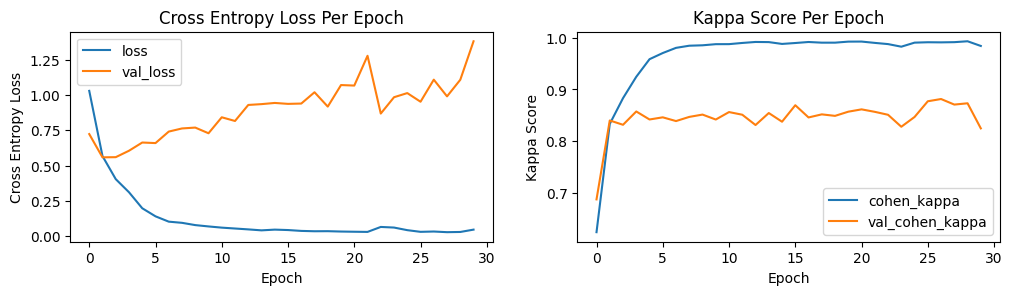

In [ ]:
plt.figure(figsize=[12,6])
plt.subplot(2,2,1)
plt.plot(history_dn.history['loss'],label='loss')
plt.plot(history_dn.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.legend()
plt.title('Cross Entropy Loss Per Epoch')

plt.subplot(2,2,2)
plt.plot(history_dn.history['cohen_kappa'],label='cohen_kappa')
plt.plot(history_dn.history['val_cohen_kappa'],label='val_cohen_kappa')
plt.xlabel('Epoch')
plt.ylabel('Kappa Score')
plt.title('Kappa Score Per Epoch')
plt.legend()

plt.show()

18/18 [==============================] - 11s 248ms/step


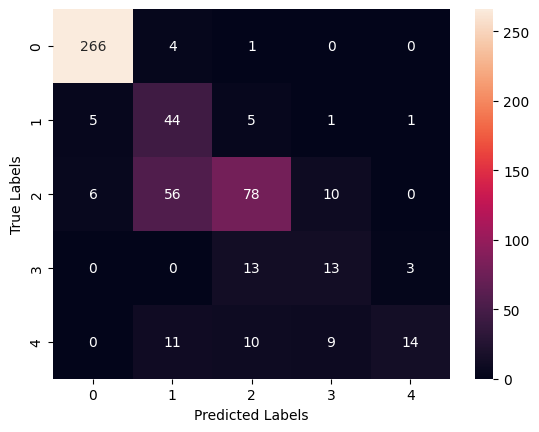

In [ ]:
y_pred = model_dn.predict(val_images)
cf_matrix = confusion_matrix([np.argmax(x) for x in y_val], [np.argmax(x) for x in y_pred])
sns.heatmap(cf_matrix, annot=True, fmt="0")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.show()

### Postprocessing

After training the model, it is essential to evaluate its performance to identify areas for improvement. In this section, we will analyze the outputs generated by the DenseNet-121 model.

1. **Generating Predictions**:  
   We begin by obtaining the model's predictions on the validation dataset.

In [ ]:
y_pred = model_dn.predict(val_images)

18/18 [==============================] - 2s 110ms/step


2. **Analyzing the Distribution of Absolute Errors**:  
   To assess how the model's predictions align with the actual values, we will examine the distribution of absolute errors.

   - **Calculating Absolute Errors**:  
     The absolute error is determined by subtracting the predicted probabilities from the one-hot encoded actual values. To find the maximum error for each instance, we take the maximum value after the subtraction. This maximum value corresponds to the actual class since it is the only positive value following the subtraction.

In [ ]:
dif = y_val - y_pred  # Subtracting predicted values from actual values
errors = np.amax(dif, axis=1)  # Extracting the maximum absolute error for each instance

Next, we will visualize the distribution of absolute errors to better understand how our model's predictions vary.

**Plotting the Errors**:  
We will create a histogram to illustrate the distribution of the absolute errors, including a kernel density estimate (KDE) for a smoother representation.

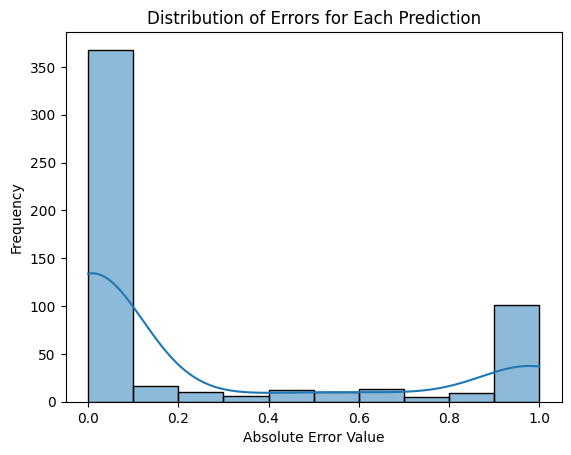

In [ ]:
# Plotting the errors
sns.histplot(x=errors, kde=True, binwidth=0.1)
plt.ylabel('Frequency')
plt.xlabel('Absolute Error Value')
plt.title('Distribution of Errors for Each Prediction')
plt.show()

The resulting plot reveals that as the absolute error value increases, the frequency of errors decreases, which is a positive indicator. Most of the error values fall within the range of 0 to 0.1. However, there is a noticeable uptick in the frequency of absolute errors between 0.8 and 1. This suggests that these instances are particularly problematic for the model, indicating a tendency for misclassification.

### Categorizing Predictions into Good, Medium, and Bad Sets

We will categorize the data based on the absolute error values into three distinct sets:

- **Good**: Points with absolute errors less than \( \frac{1}{3} \)
- **Medium**: Points with absolute errors between \( \frac{1}{3} \) and \( \frac{2}{3} \)
- **Bad**: Points with absolute errors greater than \( \frac{2}{3} \)

#### Categorizing the Errors

We can initialize three lists to store the indices of the errors in each category:

In [ ]:
good = []    # List for good points
medium = []  # List for medium points
bad = []     # List for bad points

# Dividing the data based on error values
for index, error in enumerate(errors):
    if error < 1/3:
        good.append(index)
    elif error < 2/3:
        medium.append(index)
    else:
        bad.append(index)

#### Visualizing the Counts

Next, we'll create a bar graph to visualize how many points fall into each category:

<ipython-input-44-95d748d4a831>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['good', 'medium', 'bad'], y=[len(good), len(medium), len(bad)], palette='Accent', ax=ax)


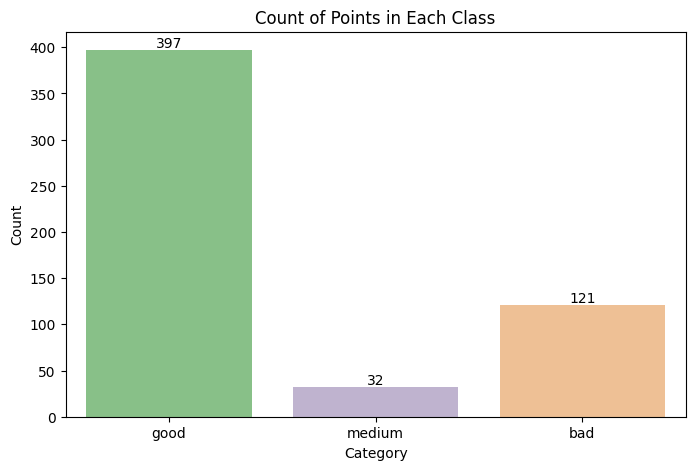

In [ ]:
# Creating a bar plot for the counts of each category
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=['good', 'medium', 'bad'], y=[len(good), len(medium), len(bad)], palette='Accent', ax=ax)

# Annotating the bar heights
for p in ax.patches:
   ax.annotate('{}'.format(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.ylabel('Count')  # Y-axis label
plt.xlabel('Category')  # X-axis label
plt.title('Count of Points in Each Class')  # Title
plt.show()

While most predictions are in the **good** set, the **bad** set remains a significant concern as it contains instances where the model consistently misclassifies outcomes.

**Displaying sample images from each set** helps visually analyze where the model performs well and where it struggles. Here's how sample images from the **good** set are displayed:

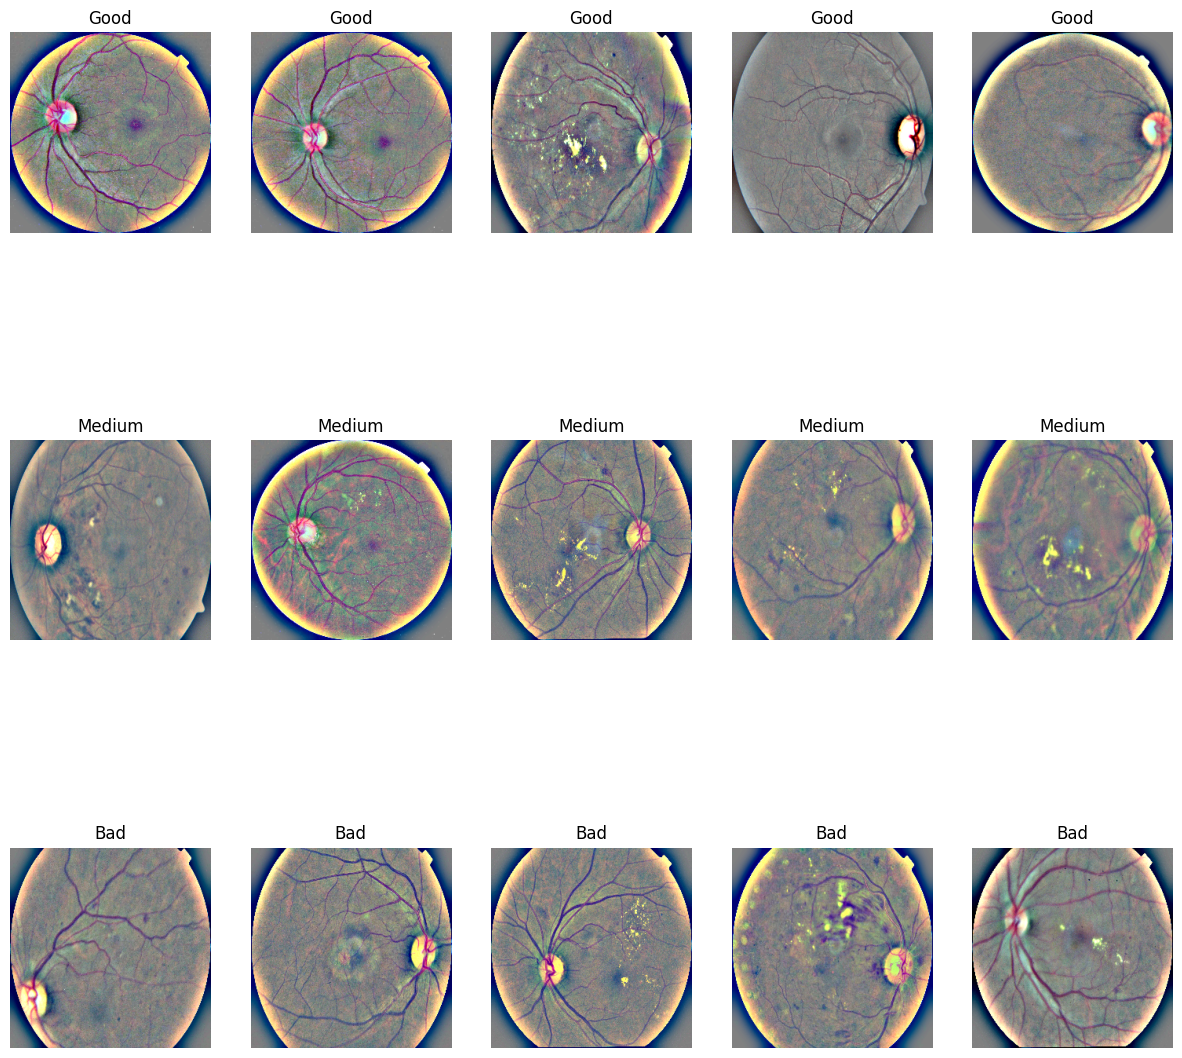

In [ ]:
plt.figure(figsize=(15, 15))

# Concatenate the good, medium, and bad arrays to get 5 samples from each category.
combined_indices = np.concatenate([good[:5], medium[:5], bad[:5]])  # 15 images in total.
labels = ['Good'] * 5 + ['Medium'] * 5 + ['Bad'] * 5  # Create labels for the images.

for i, x in enumerate(val_images[combined_indices]):  # Fetching sample images
    plt.subplot(3, 5, i + 1)  # Create a 3x5 grid for 15 images
    plt.axis('off')
    plt.imshow(x)
    plt.title(labels[i], fontsize=12)  # Display class name below each image

plt.show()


The model performs well on eye images with minimal or no spots, has medium success with images where spots are concentrated, and struggles with images that have scattered spots. Additionally, many of the misclassified images in the medium and bad categories lack a complete eyeball.

To analyze which categories the model excels at and where it faces difficulties, a count plot can be used to visualize the class distribution in the **good** set:

<ipython-input-52-4da4cd0db967>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=np.argmax(y_val[good], axis=1), palette='Accent')  # Count of points from each category


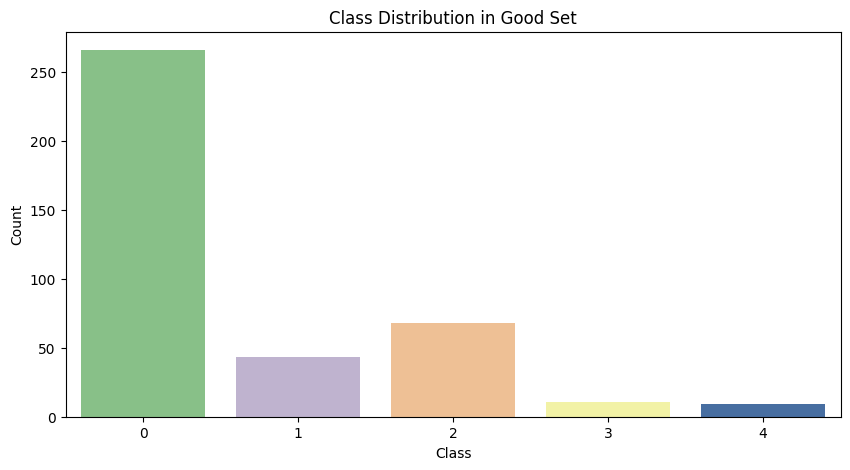

<ipython-input-52-4da4cd0db967>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=np.argmax(y_val[medium], axis=1), palette='Accent')  # Count of points from each category


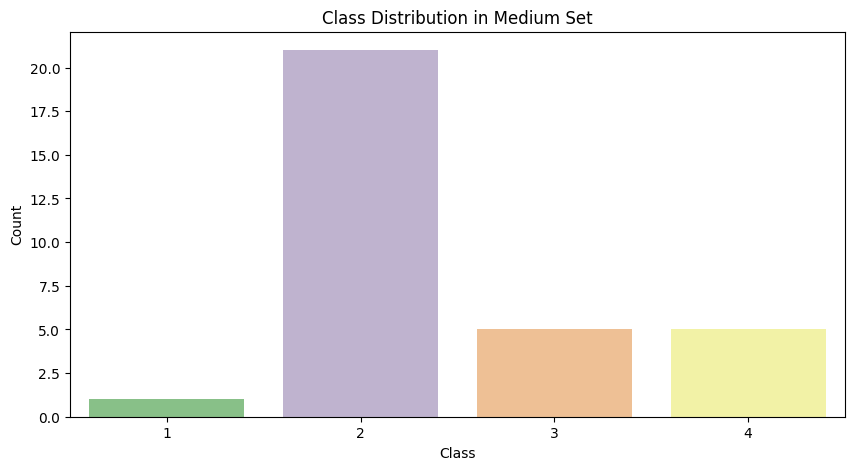

<ipython-input-52-4da4cd0db967>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=np.argmax(y_val[bad], axis=1), palette='Accent')  # Count of points from each category


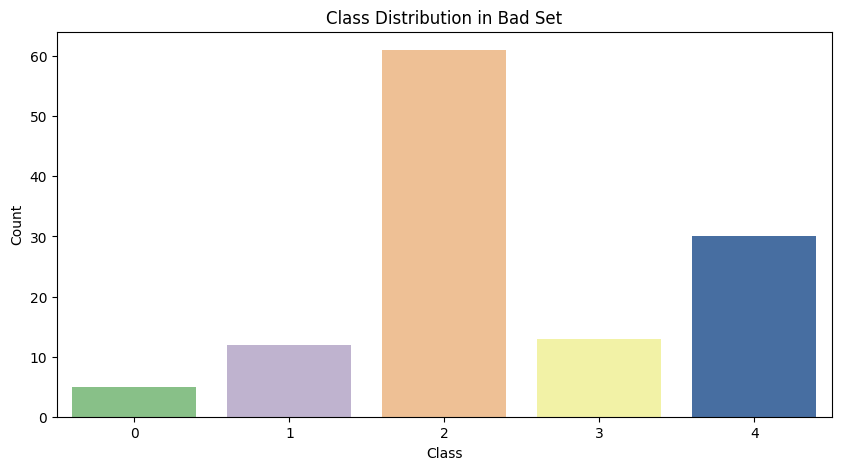

In [ ]:
# Plotting for the 'Good' set
plt.figure(figsize=(10, 5))
sns.countplot(x=np.argmax(y_val[good], axis=1), palette='Accent')  # Count of points from each category
plt.xlabel('Class')  # x-axis label
plt.ylabel('Count')  # y-axis label
plt.title('Class Distribution in Good Set')  # Title for Good set
plt.show()

# Plotting for the 'Medium' set
plt.figure(figsize=(10, 5))
sns.countplot(x=np.argmax(y_val[medium], axis=1), palette='Accent')  # Count of points from each category
plt.xlabel('Class')  # x-axis label
plt.ylabel('Count')  # y-axis label
plt.title('Class Distribution in Medium Set')  # Title for Medium set
plt.show()

# Plotting for the 'Bad' set
plt.figure(figsize=(10, 5))
sns.countplot(x=np.argmax(y_val[bad], axis=1), palette='Accent')  # Count of points from each category
plt.xlabel('Class')  # x-axis label
plt.ylabel('Count')  # y-axis label
plt.title('Class Distribution in Bad Set')  # Title for Bad set
plt.show()

###**Applying LIME to identify the specific regions of the image that contribute to the classification decision.**###

LIME (Local Interpretable Model-agnostic Explanations) is used to understand which regions of an image are most influential in a model's prediction. By generating interpretable explanations, LIME identifies these critical areas by approximating complex models with simpler, interpretable ones. Here's how we can visualize the regions that contribute to the classification for images in the **good** set:

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 51ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 29ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 27ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 28ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 53ms/step


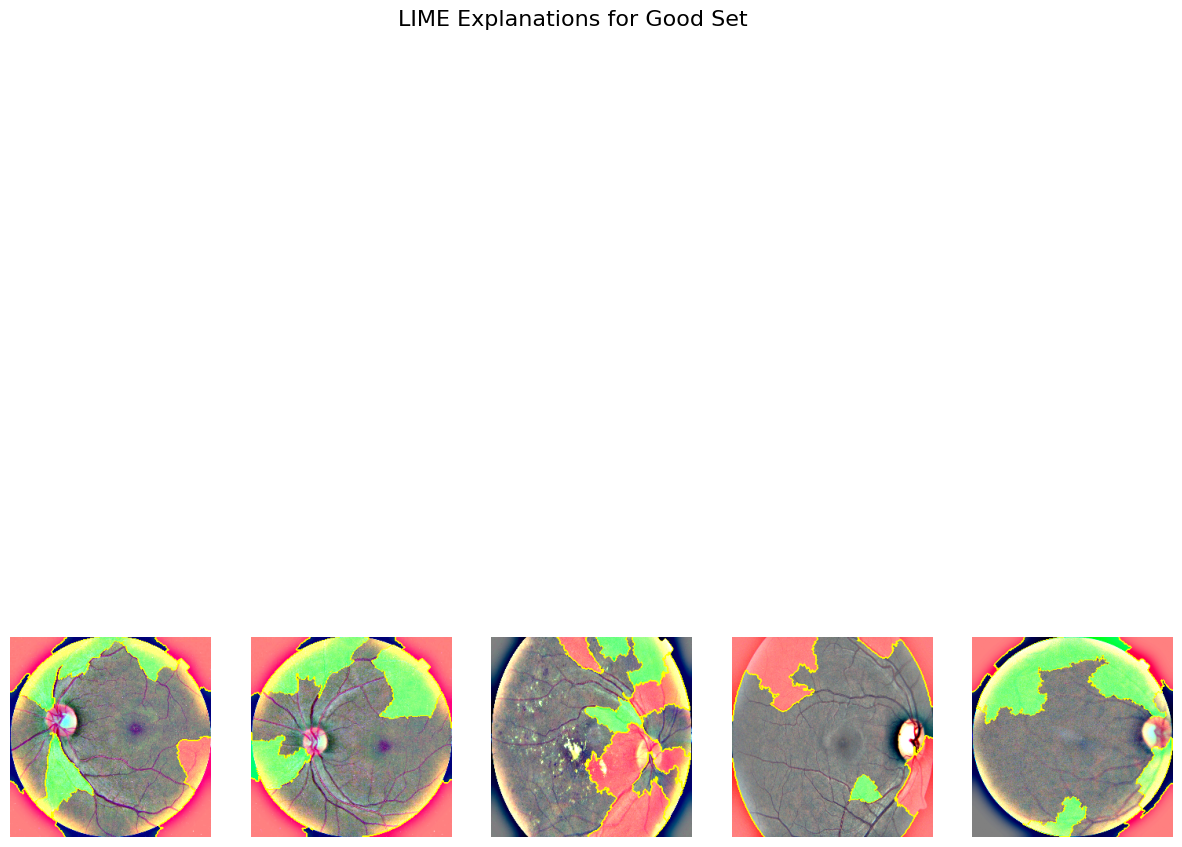

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 28ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 37ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 44ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 28ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 28ms/step


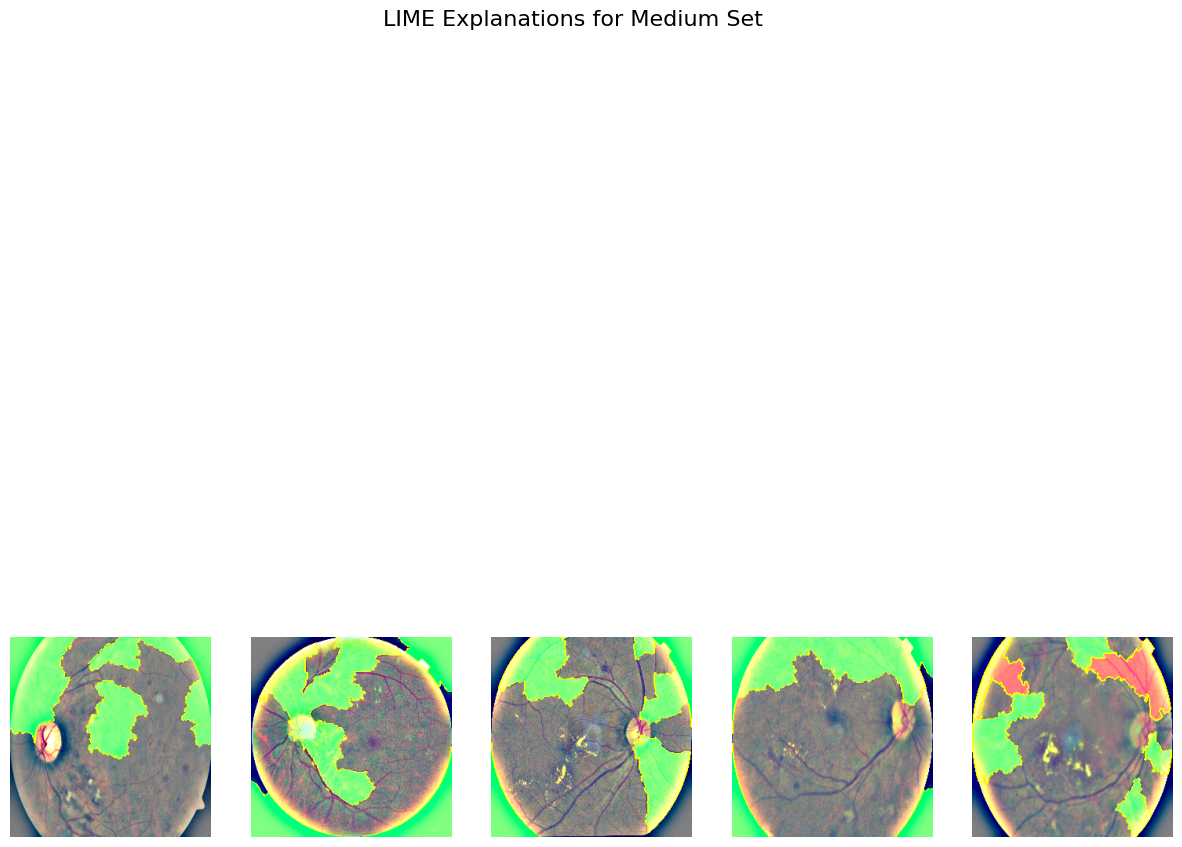

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 45ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 29ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 40ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 49ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 28ms/step


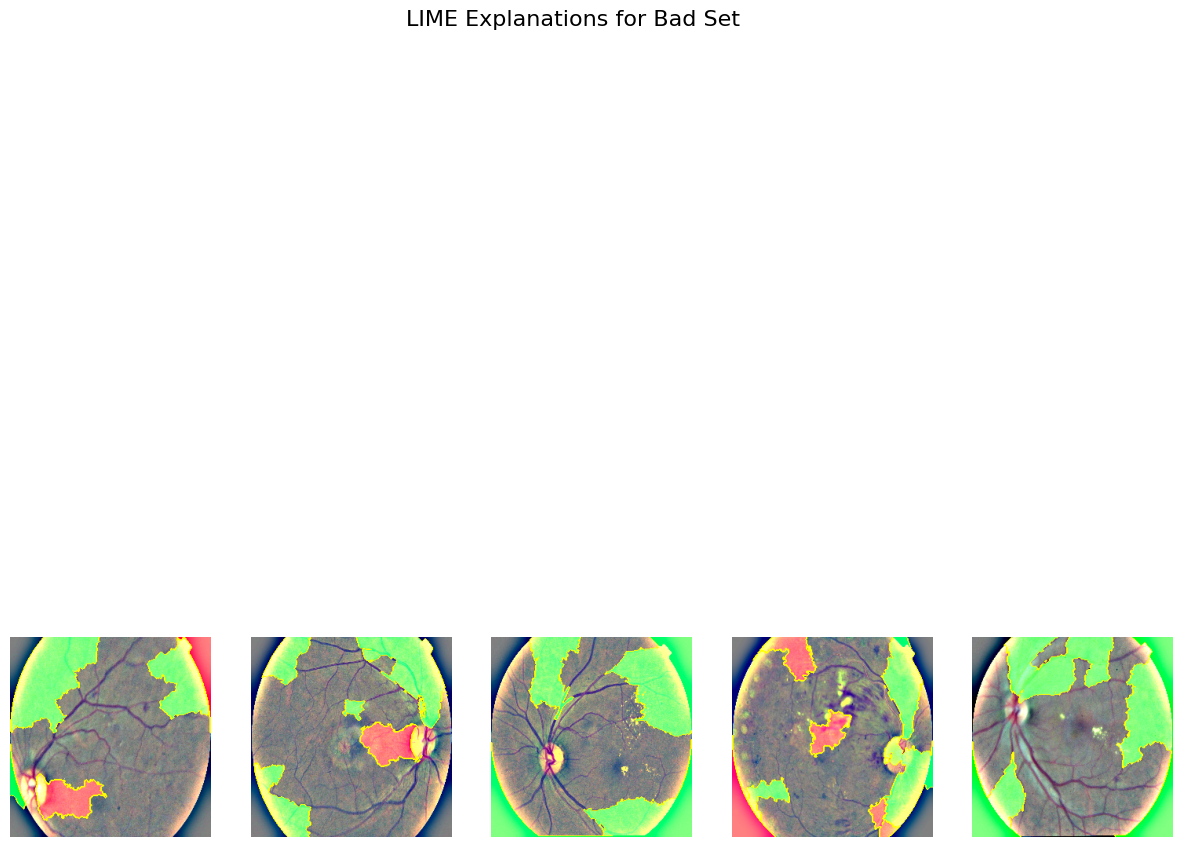

In [ ]:
from lime import lime_image
from keras.models import Model

explainer = lime_image.LimeImageExplainer()

def display_explanations(image_set, title):
    plt.figure(figsize=(15, 15))
    for x in range(5):
        explanation = explainer.explain_instance(image_set[x], final.predict,
                                                 top_labels=3, hide_color=0, num_samples=1000)
        temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0],
                                                        positive_only=False,
                                                        num_features=10, hide_rest=False)
        plt.subplot(1, 5, x + 1)
        plt.imshow(mark_boundaries(temp_1, mask_1))
        plt.axis('off')

    plt.suptitle(f'LIME Explanations for {title}', fontsize=16)
    plt.show()

display_explanations(val_images[good], 'Good Set')
display_explanations(val_images[medium], 'Medium Set')
display_explanations(val_images[bad], 'Bad Set')

The green regions indicate pixels that increase the likelihood of the image being classified into the predicted class, while the red regions signify pixels that decrease this probability. As the absolute error rises, the green region tends to expand, and the red region diminishes. In images classified as good, there's a clear distinction between the border and the eyeball, whereas images with higher absolute errors often indicate the model's struggle to accurately identify the eyeball.

To enhance performance, we can focus on these areas of improvement.